# Actividad 1 Programación y entorno de trabajo para la IA

### Realizado por: **Marco Fernández Pérez**

## Parte 1

Comenzamos con la importación de las librerías que se van a usar durante la actividad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los datos de los tres trimestres leyendo los archivos ```.csv```.

In [2]:
trimestre1 = pd.read_csv('./Hogwards - 20241T.csv')
trimestre2 = pd.read_csv('./Hogwards - 20242T.csv')
trimestre3 = pd.read_csv('./Hogwards - 20243T.csv')

Mostramos las primeras 5 entradas del primer trimestre para observar la forma de los datos.

In [3]:
trimestre1.head()

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51


Ahora miramos la forma de cada trimestre para ver el número de entradas. Para ello usaremos la función ```.shape```

In [4]:
trimestre1.shape

(50, 10)

In [5]:
trimestre2.shape

(70, 10)

In [6]:
trimestre3.shape

(87, 10)

Observamos si hay algún nulo usando ```.isna()``` y sumando el número de nulos con ```.sum()```

In [7]:
trimestre1.isna().sum()

ID                  0
Name                0
Descriptive Name    0
Description         0
Domain              0
Owner               0
IsCompliance        0
Status              0
Version             0
NumberUsers         0
dtype: int64

In [8]:
trimestre2.isna().sum()

ID                  0
Name                0
Descriptive Name    0
Description         0
Domain              0
Owner               0
IsCompliance        0
Status              0
Version             0
NumberUsers         0
dtype: int64

In [9]:
trimestre3.isna().sum()

ID                  0
Name                0
Descriptive Name    0
Description         0
Domain              0
Owner               0
IsCompliance        0
Status              0
Version             0
NumberUsers         0
dtype: int64

Observamos que no hay ningún dato nulo.

## Estado actual de los *Data Products*

Ahora pasamos a conseguir el número de *Data Products* existen actualmente, es decir, contamos los *Data Products* del último trimestre.

In [10]:
Number_of_Products = trimestre3['ID'].nunique()

Number_of_Products

87

Ahora, buscamos el número de productos para cada dominio. Para ello, agrupamos productos por dominio y contamos el número de producos en cada dominio.

In [11]:
Number_of_Products_by_Domain = (
    trimestre3.groupby('Domain')['ID']
    .nunique()
    .reset_index()
)

Number_of_Products_by_Domain

,Domain,ID
0,Adivinacion,13
1,Astronomia,7
2,Cuidado de Criaturas Magicas,7
3,Defensa Contra las Artes Oscuras,10
4,Encantamientos,8
5,Herbologia,10
6,Historia de la Magia,12
7,Pociones,11
8,Transformaciones,9


Por último, buscamos el número de productos para cada estado, siguiendo el mismo proceso que en el caso anterior.

In [12]:
Number_of_Products_by_Status = (
    trimestre3.groupby('Status')['ID']
    .nunique()
    .reset_index()
)

Number_of_Products_by_Status

,Status,ID
0,Deprecated,21
1,Development,18
2,Planned,24
3,Production,24


Para apreciar qué areas de Hogwarts están mejor y peor preparadas, sacamos el número de productos de cada dominio dividido por cada estado usando la función ```.unstack(fill_value=0)```para rellenar los casos sin datos con el valor 0.

In [13]:
Number_of_Products_by_Domain_and_Status = (
    trimestre3.groupby(['Domain', 'Status'])
    .size()
    .unstack(fill_value=0)
)

Number_of_Products_by_Domain_and_Status

Status,Deprecated,Development,Planned,Production
Domain,,,,
Adivinacion,1,3,2,7
Astronomia,1,1,3,2
Cuidado de Criaturas Magicas,2,0,2,3
Defensa Contra las Artes Oscuras,1,2,6,1
Encantamientos,3,3,0,2
Herbologia,3,0,6,1
Historia de la Magia,3,5,3,1
Pociones,3,2,1,5
Transformaciones,4,2,1,2


## Análisis trimestral de los *Data Products* en estado "Planned" o "Production"

Ahora, pasaremos al análisis trimestral de los *Data Products* en estado "Planned" o "Production". Comenzamos filtrando los *Data Products* cuyo estado es **Planned** o **Production**.

In [14]:
trimestre1_planned_o_production = trimestre1[trimestre1['Status'].isin(['Planned', 'Production'])]
trimestre2_planned_o_production = trimestre2[trimestre2['Status'].isin(['Planned', 'Production'])]
trimestre3_planned_o_production = trimestre3[trimestre3['Status'].isin(['Planned', 'Production'])]
trimestre1_planned_o_production

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51
5,DP006,EstelarMap,Guardian de la Historia,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,2.0.8,72
8,DP009,HerboApp,Mapa Estelar,Data Product relacionado con cuidado de criatu...,Cuidado de Criaturas Magicas,Rubeus Hagrid,False,Production,2.3.7,74
10,DP011,Transfigurator,Monitor de Profecias,Data Product relacionado con defensa contra la...,Defensa Contra las Artes Oscuras,Alastor Moody,True,Production,0.3.9,96
11,DP012,HerboApp,Vigilante de Criaturas Magicas,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Planned,0.5.5,100
14,DP015,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con pociones, utiliza...",Pociones,Horace Slughorn,True,Planned,0.3.9,100
15,DP016,Transfigurator,Registro de Encantamientos,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,False,Production,1.3.9,56
16,DP017,HerboApp,Sistema de Seguimiento de Hechizos,"Data Product relacionado con adivinacion, util...",Adivinacion,Firenze,False,Production,0.2.3,50


Ahora, vamos sacando las respuestas a las preguntas para el trimestre 1 y después sacamos esas respuestas para el resto de trimestres.

Comenzamos filtrando las entradas de los *Data Products* que cumplen con las normas

In [15]:
trimestre1_planned_o_production_normas_compliance = trimestre1_planned_o_production[trimestre1_planned_o_production['IsCompliance'] == True].shape[0]
trimestre1_planned_o_production_normas_compliance

14

Pasamos al conteo de usuarios agrupando por cada area.

In [16]:
trimestre1_planned_o_production_usuarios_por_area = trimestre1_planned_o_production.groupby('Domain')['NumberUsers'].sum()
trimestre1_planned_o_production_usuarios_por_area

Domain
Adivinacion                         259
Astronomia                          363
Cuidado de Criaturas Magicas        183
Defensa Contra las Artes Oscuras    177
Encantamientos                      200
Herbologia                          372
Historia de la Magia                 56
Pociones                            288
Transformaciones                     78
Name: NumberUsers, dtype: int64

In [17]:
trimestre2_planned_o_production_normas_compliance = trimestre2_planned_o_production[trimestre2_planned_o_production['IsCompliance'] == True].shape[0]
trimestre3_planned_o_production_normas_compliance = trimestre3_planned_o_production[trimestre3_planned_o_production['IsCompliance'] == True].shape[0]

In [18]:
trimestre2_planned_o_production_usuarios_por_area = trimestre2_planned_o_production.groupby('Domain')['NumberUsers'].sum()
trimestre3_planned_o_production_usuarios_por_area = trimestre3_planned_o_production.groupby('Domain')['NumberUsers'].sum()

## Análisis trimestral de los *Data Products* "Deprecated"

Comenzamos filtrando los *Data Products* por el estado **Deprecated**.

In [19]:
trimestre1_deprecated = trimestre1[trimestre1['Status'] == 'Deprecated']
trimestre2_deprecated = trimestre2[trimestre2['Status'] == 'Deprecated']
trimestre3_deprecated = trimestre3[trimestre3['Status'] == 'Deprecated']
trimestre1_deprecated

,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38
6,DP007,TrackHechizo,Mapa Estelar,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Deprecated,2.9.2,100
9,DP010,Transfigurator,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.6.2,43
13,DP014,CriaturaWatch,Monitor de Profecias,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Deprecated,2.6.2,20
17,DP018,HistoriKeeper,Sistema de Seguimiento de Hechizos,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,False,Deprecated,2.5.2,100
26,DP027,Transfigurator,Monitor de Profecias,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,False,Deprecated,2.4.2,58
30,DP031,Transfigurator,Registro de Encantamientos,"Data Product relacionado con encantamientos, u...",Encantamientos,Filius Flitwick,False,Deprecated,2.8.4,17
31,DP032,ProfeciaMonitor,Aplicacion de Herbologia,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Deprecated,0.4.7,52
42,DP043,Transfigurator,Vigilante de Criaturas Magicas,"Data Product relacionado con herbologia, utili...",Herbologia,Pomona Sprout,True,Deprecated,0.8.0,50
44,DP045,HistoriKeeper,Mapa Estelar,Data Product relacionado con historia de la ma...,Historia de la Magia,Cuthbert Binns,True,Deprecated,0.2.1,39


Ahora agrupamos según el dominio.

In [20]:
trimestre1_deprecated_por_area = trimestre1_deprecated.groupby('Domain')['ID'].nunique()
trimestre2_deprecated_por_area = trimestre2_deprecated.groupby('Domain')['ID'].nunique()
trimestre3_deprecated_por_area = trimestre3_deprecated.groupby('Domain')['ID'].nunique()
trimestre1_deprecated_por_area

Domain
Adivinacion             1
Encantamientos          2
Herbologia              3
Historia de la Magia    2
Pociones                2
Transformaciones        2
Name: ID, dtype: int64

Vamos a conseguir el dato de cuántos usuarios usan estos *Data Products* que ya no están en servicio

In [21]:
trimestre1_deprecated_por_area_num_usuarios = trimestre1_deprecated['NumberUsers'].sum()
trimestre2_deprecated_por_area_num_usuarios = trimestre2_deprecated['NumberUsers'].sum()
trimestre3_deprecated_por_area_num_usuarios = trimestre3_deprecated['NumberUsers'].sum()
trimestre1_deprecated_por_area_num_usuarios

668

## Análisis de los funcionarios (Owners) por cada trimestre

Comenzamos sacando cuántos funcionarios están trabajando y cuántos *Data Products* (por estado) tienen asignados


In [22]:
trimestre1_owners = (
    trimestre1.groupby(['Owner', 'Status'])['ID']
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)

trimestre2_owners = (
    trimestre2.groupby(['Owner', 'Status'])['ID']
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)

trimestre3_owners = (
    trimestre3.groupby(['Owner', 'Status'])['ID']
    .nunique()
    .unstack(fill_value=0)
    .reset_index()
)
trimestre1_owners

Status,Owner,Deprecated,Development,Planned,Production
0,Alastor Moody,0,0,0,1
1,Aurora Sinistra,0,0,3,1
2,Cuthbert Binns,2,3,0,1
3,Filius Flitwick,2,1,0,2
4,Firenze,0,1,0,2
5,Horace Slughorn,0,1,1,1
6,Minerva McGonagall,2,2,1,1
7,Pomona Sprout,3,0,4,0
8,Rubeus Hagrid,0,0,1,1
9,Severus Snape,2,2,1,2


Ahora, pasamos a conseguir para cada dominio, quienes son los 3 funcionarios con más usuarios en sus *Data Products* en estado "Planned" o "Production".

In [23]:
trimestre1_owners_por_dominio_ordenados_por_usuarios = trimestre1[trimestre1['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index().sort_values(['Domain', 'NumberUsers'], ascending=[True, False])
trimestre2_owners_por_dominio_ordenados_por_usuarios = trimestre2[trimestre2['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index().sort_values(['Domain', 'NumberUsers'], ascending=[True, False])
trimestre3_owners_por_dominio_ordenados_por_usuarios = trimestre3[trimestre3['Status'].isin(['Planned', 'Production'])].groupby(['Domain', 'Owner'])['NumberUsers'].sum().reset_index().sort_values(['Domain', 'NumberUsers'], ascending=[True, False])
trimestre1_owners_por_dominio_ordenados_por_usuarios

,Domain,Owner,NumberUsers
0,Adivinacion,Firenze,150
1,Adivinacion,Sybill Trelawney,109
2,Astronomia,Aurora Sinistra,363
3,Cuidado de Criaturas Magicas,Rubeus Hagrid,168
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,15
5,Defensa Contra las Artes Oscuras,Alastor Moody,96
6,Defensa Contra las Artes Oscuras,Severus Snape,81
7,Encantamientos,Filius Flitwick,200
8,Herbologia,Pomona Sprout,372
9,Historia de la Magia,Cuthbert Binns,56


Seguimos con el Owner menos productivo de cada dominio.

In [24]:
trimestre1_worst_owners_total = trimestre1.groupby(['Domain', 'Owner']).size().reset_index(name='Total_Products') # Agrupamos por Domain y Owner, contando el total de Data Products de cada Owner en cada Domain
trimestre1_worst_owners_deprecated = trimestre1[trimestre1['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='Deprecated_Products') # Hacemos lo mismo pero filtrando solo los Data Products en estado 'Deprecated'
trimestre1_worst_owners = pd.merge(trimestre1_worst_owners_total, trimestre1_worst_owners_deprecated, on=['Domain','Owner'], how='left') # Unimos ambos DataFrames para tener el total y los deprecated juntos
trimestre1_worst_owners['Deprecated_Products'] = trimestre1_worst_owners['Deprecated_Products'].fillna(0) # Rellenamos los NaN con 0, ya que si un Owner no tiene productos deprecated, queremos que sea 0 y no NaN
trimestre1_worst_owners['Ratio_Deprecated'] = trimestre1_worst_owners['Deprecated_Products'] / trimestre1_worst_owners['Total_Products'] # Calculamos el ratio de productos deprecated sobre el total para cada caso
trimestre1_worst_owners_sorted = trimestre1_worst_owners.sort_values(by='Ratio_Deprecated', ascending=False) # Ordenamos de mayor a menor ratio para identificar los peores Owners
trimestre1_worst_owners_sorted

,Domain,Owner,Total_Products,Deprecated_Products,Ratio_Deprecated
8,Herbologia,Pomona Sprout,7,3.0,0.428571
7,Encantamientos,Filius Flitwick,5,2.0,0.400000
11,Pociones,Severus Snape,5,2.0,0.400000
9,Historia de la Magia,Cuthbert Binns,6,2.0,0.333333
12,Transformaciones,Minerva McGonagall,6,2.0,0.333333
1,Adivinacion,Sybill Trelawney,5,1.0,0.200000
0,Adivinacion,Firenze,3,0.0,0.000000
2,Astronomia,Aurora Sinistra,4,0.0,0.000000
3,Cuidado de Criaturas Magicas,Rubeus Hagrid,2,0.0,0.000000
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,1,0.0,0.000000


In [25]:
trimestre2_worst_owners_total = trimestre2.groupby(['Domain', 'Owner']).size().reset_index(name='Total_Products')
trimestre2_worst_owners_deprecated = trimestre2[trimestre2['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='Deprecated_Products')
trimestre2_worst_owners = pd.merge(trimestre2_worst_owners_total, trimestre2_worst_owners_deprecated, on=['Domain','Owner'], how='left')
trimestre2_worst_owners['Deprecated_Products'] = trimestre2_worst_owners['Deprecated_Products'].fillna(0)
trimestre2_worst_owners['Ratio_Deprecated'] = trimestre2_worst_owners['Deprecated_Products'] / trimestre2_worst_owners['Total_Products']
trimestre2_worst_owners_sorted = trimestre2_worst_owners.sort_values(by='Ratio_Deprecated', ascending=False)
trimestre2_worst_owners_sorted

,Domain,Owner,Total_Products,Deprecated_Products,Ratio_Deprecated
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,2,1.0,0.500000
5,Defensa Contra las Artes Oscuras,Alastor Moody,2,1.0,0.500000
7,Encantamientos,Filius Flitwick,6,3.0,0.500000
12,Transformaciones,Minerva McGonagall,9,4.0,0.444444
8,Herbologia,Pomona Sprout,9,3.0,0.333333
11,Pociones,Severus Snape,6,2.0,0.333333
9,Historia de la Magia,Cuthbert Binns,9,2.0,0.222222
1,Adivinacion,Sybill Trelawney,7,1.0,0.142857
0,Adivinacion,Firenze,4,0.0,0.000000
2,Astronomia,Aurora Sinistra,6,0.0,0.000000


In [26]:
trimestre3_worst_owners_total = trimestre3.groupby(['Domain', 'Owner']).size().reset_index(name='Total_Products')
trimestre3_worst_owners_deprecated = trimestre3[trimestre3['Status'] == 'Deprecated'].groupby(['Domain', 'Owner']).size().reset_index(name='Deprecated_Products')
trimestre3_worst_owners = pd.merge(trimestre3_worst_owners_total, trimestre3_worst_owners_deprecated, on=['Domain','Owner'], how='left')    
trimestre3_worst_owners['Deprecated_Products'] = trimestre3_worst_owners['Deprecated_Products'].fillna(0)
trimestre3_worst_owners['Ratio_Deprecated'] = trimestre3_worst_owners['Deprecated_Products'] / trimestre3_worst_owners['Total_Products']
trimestre3_worst_owners_sorted = trimestre3_worst_owners.sort_values(by='Ratio_Deprecated', ascending=False)
trimestre3_worst_owners_sorted

,Domain,Owner,Total_Products,Deprecated_Products,Ratio_Deprecated
4,Cuidado de Criaturas Magicas,Wilhelmina Grubbly-Plank,3,2.0,0.666667
13,Transformaciones,Minerva McGonagall,9,4.0,0.444444
12,Pociones,Severus Snape,7,3.0,0.428571
8,Encantamientos,Filius Flitwick,8,3.0,0.375000
5,Defensa Contra las Artes Oscuras,Alastor Moody,3,1.0,0.333333
9,Herbologia,Pomona Sprout,10,3.0,0.300000
10,Historia de la Magia,Cuthbert Binns,12,3.0,0.250000
1,Adivinacion,Sybill Trelawney,7,1.0,0.142857
2,Astronomia,Aurora Sinistra,7,1.0,0.142857
0,Adivinacion,Firenze,6,0.0,0.000000


Por último, tenemos que conseguir los Owners que trabajen en más de un dominio.

In [27]:
trimestre1_owners_multiple_domains = (
    trimestre1.groupby('Owner')['Domain']
    .nunique()
    .reset_index()
    .query('Domain > 1')
)
trimestre2_owners_multiple_domains = (
    trimestre2.groupby('Owner')['Domain']
    .nunique()
    .reset_index()
    .query('Domain > 1')
)
trimestre3_owners_multiple_domains = (
    trimestre3.groupby('Owner')['Domain']
    .nunique()
    .reset_index()
    .query('Domain > 1')
)
trimestre1_owners_multiple_domains

,Owner,Domain
9,Severus Snape,2


## Parte 2

En esta parte, pasamos a la representación de los estudios otenidos. Se usarán gráficos para facilitar la comprensión de los análisis

## Estado actual de los Data Products

Para el estado actual de los *Data Products*, se usa un gráfico de barras apiladas, donde cada barra representa cada dominio y cada barra está dividida en los diferentes estados de los *Data Products*.

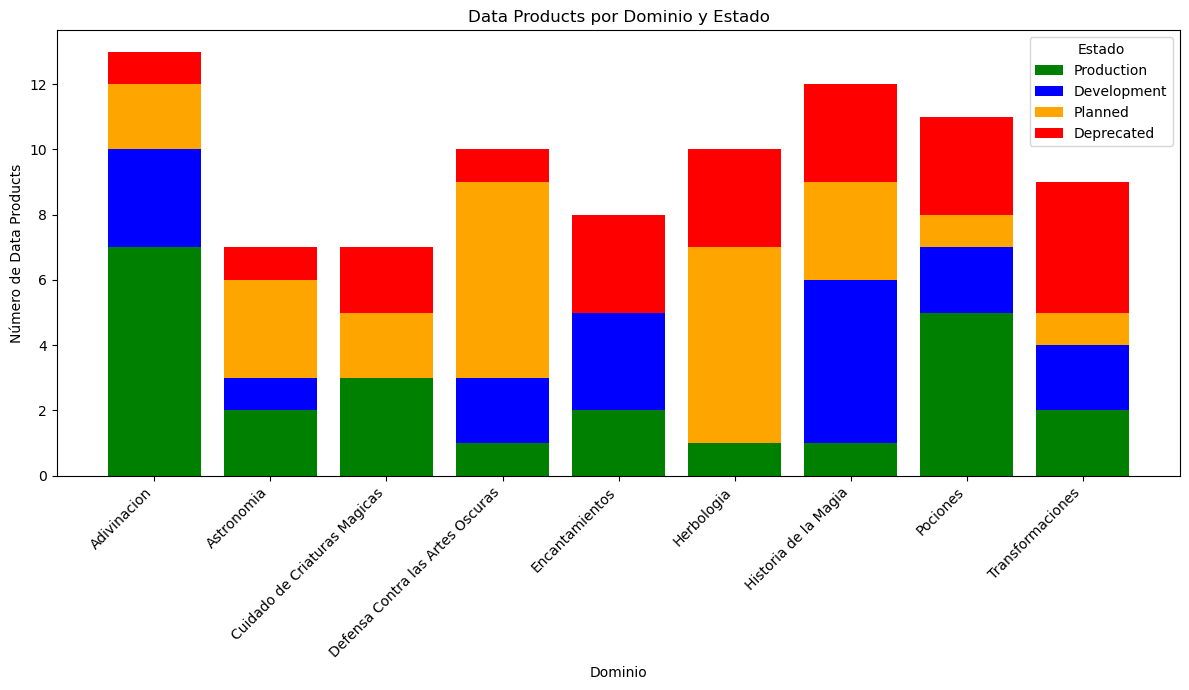

In [31]:
plt.figure(figsize=(12, 7))

colors = {
    "Planned": "orange",
    "Production": "green",
    "Deprecated": "red",
    "Development": "blue"
}
plt.bar(
    Number_of_Products_by_Domain_and_Status.index,
    Number_of_Products_by_Domain_and_Status.get('Production', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    color=colors['Production'],
    label='Production'
)
plt.bar(
    Number_of_Products_by_Domain_and_Status.index,
    Number_of_Products_by_Domain_and_Status.get('Development', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    bottom=Number_of_Products_by_Domain_and_Status.get('Production', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    color=colors['Development'],
    label='Development'
)
plt.bar(
    Number_of_Products_by_Domain_and_Status.index,
    Number_of_Products_by_Domain_and_Status.get('Planned', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    bottom=Number_of_Products_by_Domain_and_Status.get('Production', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))) + Number_of_Products_by_Domain_and_Status.get('Development', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    color=colors['Planned'],
    label='Planned'
)
plt.bar(
    Number_of_Products_by_Domain_and_Status.index,
    Number_of_Products_by_Domain_and_Status.get('Deprecated', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    bottom=Number_of_Products_by_Domain_and_Status.get('Production', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))) + Number_of_Products_by_Domain_and_Status.get('Development', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))) + Number_of_Products_by_Domain_and_Status.get('Planned', pd.Series([0]*len(Number_of_Products_by_Domain_and_Status.index))),
    color=colors['Deprecated'],
    label='Deprecated'
)
plt.title("Data Products por Dominio y Estado")
plt.xlabel("Dominio")
plt.ylabel("Número de Data Products")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Estado")
plt.tight_layout()
plt.show()

## Análisis trimestral de los Data Products en estado "Planned" o "Production"

## Análisis trimestral de los Data Products "Deprecated"

## Análisis de los funcionarios (Owners) por cada trimestre